In [140]:
import pickle as pkl
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

In [141]:
df0 = pd.read_csv('C:/Users/HP/Downloads/data_cart_abandonment.csv')

In [142]:
df0.shape

(4284, 13)

In [143]:
df0.columns

Index(['ID', 'Is_Product_Details_viewed', 'Session_Activity_Count',
       'No_Items_Added_InCart', 'No_Items_Removed_FromCart', 'No_Cart_Viewed',
       'No_Checkout_Confirmed', 'No_Checkout_Initiated ',
       'No_Cart_Items_Viewed', 'No_Customer_Login', 'No_Page_Viewed',
       'Customer_Segment_Type', 'Cart_Abandoned'],
      dtype='object')

In [144]:
df0.head(n=20)

,ID,Is_Product_Details_viewed,Session_Activity_Count,No_Items_Added_InCart,No_Items_Removed_FromCart,No_Cart_Viewed,No_Checkout_Confirmed,No_Checkout_Initiated,No_Cart_Items_Viewed,No_Customer_Login,No_Page_Viewed,Customer_Segment_Type,Cart_Abandoned
0,Session_ID_0,Yes,4,1.0,0,0.0,0,0,1,0,0,0,1
1,Session_ID_1,No,38,0.0,0,2.0,0,0,2,0,2,0,1
2,Session_ID_2,No,8,5.0,0,0.0,1,1,1,0,0,1,0
3,Session_ID_3,No,6,0.0,0,2.0,0,0,4,0,0,0,1
4,Session_ID_4,Yes,31,14.0,12,1.0,0,0,4,0,0,2,1
5,Session_ID_5,Yes,13,6.0,0,0.0,0,1,1,0,5,1,1
6,Session_ID_6,No,14,4.0,1,0.0,1,1,1,0,0,1,0
7,Session_ID_7,No,7,1.0,0,NaN,0,1,1,0,3,0,1
8,Session_ID_8,No,13,8.0,1,NaN,0,0,1,0,1,1,1
9,Session_ID_9,No,17,4.0,1,NaN,1,2,2,1,1,1,0


In [145]:
df0.dtypes

ID                            object
Is_Product_Details_viewed     object
Session_Activity_Count         int64
No_Items_Added_InCart        float64
No_Items_Removed_FromCart      int64
No_Cart_Viewed               float64
No_Checkout_Confirmed          int64
No_Checkout_Initiated          int64
No_Cart_Items_Viewed           int64
No_Customer_Login              int64
No_Page_Viewed                 int64
Customer_Segment_Type          int64
Cart_Abandoned                 int64
dtype: object

In [146]:
df0.describe()

,Session_Activity_Count,No_Items_Added_InCart,No_Items_Removed_FromCart,No_Cart_Viewed,No_Checkout_Confirmed,No_Checkout_Initiated,No_Cart_Items_Viewed,No_Customer_Login,No_Page_Viewed,Customer_Segment_Type,Cart_Abandoned
count,4284.000000,4275.000000,4284.000000,4275.000000,4284.000000,4284.000000,4284.000000,4284.000000,4284.000000,4284.000000,4284.000000
mean,13.878151,3.488421,0.867180,1.444211,0.187208,0.980159,2.295985,0.169234,2.348506,0.563259,0.856209
std,15.934084,6.789401,3.070022,2.082496,0.517691,1.140525,6.052666,0.400299,2.868862,0.703856,0.350918
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000
50%,10.000000,2.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,2.000000,0.000000,1.000000
75%,17.000000,5.000000,0.000000,2.000000,0.000000,1.000000,2.000000,0.000000,3.000000,1.000000,1.000000
max,436.000000,225.000000,50.000000,34.000000,11.000000,14.000000,256.000000,3.000000,35.000000,2.000000,1.000000


In [147]:
missing_values_count = df0.isnull().sum()
print(missing_values_count)
null_col = df0.columns[df0.isna().any()].tolist()
print("Columns with missing values: ",null_col)

ID                           0
Is_Product_Details_viewed    0
Session_Activity_Count       0
No_Items_Added_InCart        9
No_Items_Removed_FromCart    0
No_Cart_Viewed               9
No_Checkout_Confirmed        0
No_Checkout_Initiated        0
No_Cart_Items_Viewed         0
No_Customer_Login            0
No_Page_Viewed               0
Customer_Segment_Type        0
Cart_Abandoned               0
dtype: int64
Columns with missing values:  ['No_Items_Added_InCart', 'No_Cart_Viewed']


In [148]:
df1 = df0.dropna()
missing_values_count = df1.isnull().sum()
print(missing_values_count)
null_col = df1.columns[df1.isna().any()].tolist()
print("Columns with missing values: ",null_col)
df1.shape

ID                           0
Is_Product_Details_viewed    0
Session_Activity_Count       0
No_Items_Added_InCart        0
No_Items_Removed_FromCart    0
No_Cart_Viewed               0
No_Checkout_Confirmed        0
No_Checkout_Initiated        0
No_Cart_Items_Viewed         0
No_Customer_Login            0
No_Page_Viewed               0
Customer_Segment_Type        0
Cart_Abandoned               0
dtype: int64
Columns with missing values:  []


(4271, 13)

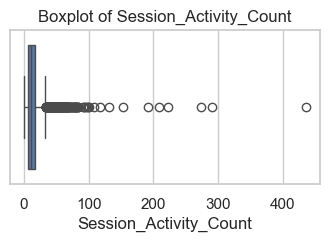

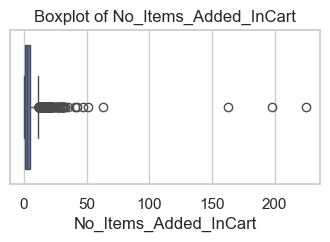

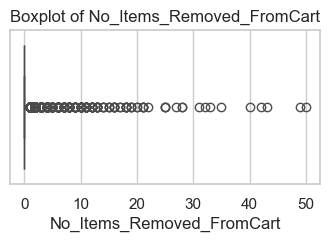

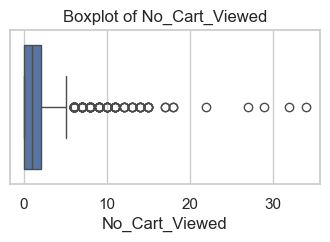

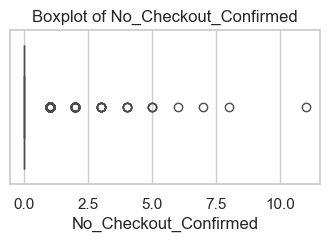

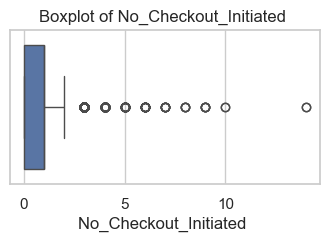

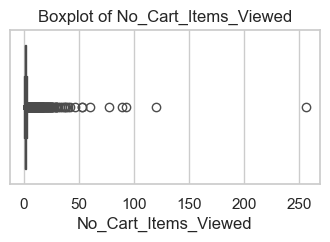

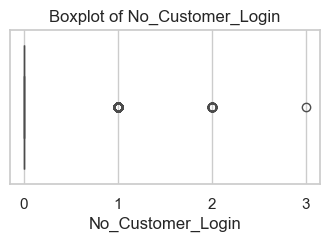

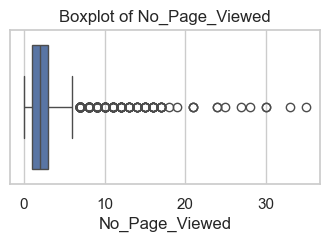

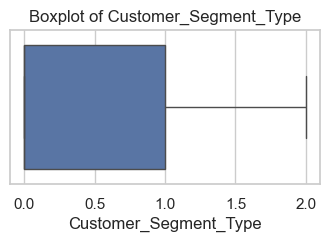

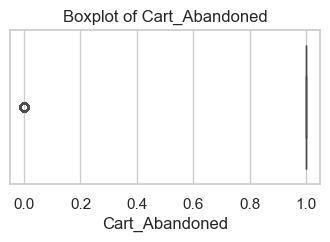

In [150]:

# Select numeric columns
numeric_cols = df1.select_dtypes(include=[np.number])

# Set the style
sns.set(style="whitegrid")

# Create boxplots for each numeric feature
for col in numeric_cols:
    plt.figure(figsize=(4, 2))
    sns.boxplot(x=df1[col])
    plt.title(f'Boxplot of {col}')
    plt.show()


In [152]:

# Manually calculate the mean and standard deviation
means = numeric_cols.mean()
stds = numeric_cols.std()

# Calculate Z-scores manually
z_scores = (numeric_cols - means) / stds
z_scores = np.abs(z_scores)

# Set a Z-score threshold
threshold = 3

# Create a boolean mask where all z-scores are below the threshold
mask = (z_scores < threshold).all(axis=1)

# Apply the mask to remove outliers
df2 = df1[mask]

# Show how many rows were removed
print(f"Original dataset shape: {df1.shape}")
print(f"Cleaned dataset shape: {df2.shape}")

df2.head(n=20)

Original dataset shape: (4271, 13)
Cleaned dataset shape: (3871, 13)


,ID,Is_Product_Details_viewed,Session_Activity_Count,No_Items_Added_InCart,No_Items_Removed_FromCart,No_Cart_Viewed,No_Checkout_Confirmed,No_Checkout_Initiated,No_Cart_Items_Viewed,No_Customer_Login,No_Page_Viewed,Customer_Segment_Type,Cart_Abandoned
0,Session_ID_0,Yes,4,1.0,0,0.0,0,0,1,0,0,0,1
1,Session_ID_1,No,38,0.0,0,2.0,0,0,2,0,2,0,1
2,Session_ID_2,No,8,5.0,0,0.0,1,1,1,0,0,1,0
3,Session_ID_3,No,6,0.0,0,2.0,0,0,4,0,0,0,1
5,Session_ID_5,Yes,13,6.0,0,0.0,0,1,1,0,5,1,1
6,Session_ID_6,No,14,4.0,1,0.0,1,1,1,0,0,1,0
20,Session_ID_20,Yes,6,3.0,0,0.0,0,0,1,0,1,1,1
21,Session_ID_21,No,35,14.0,0,3.0,1,3,3,0,9,1,1
22,Session_ID_22,No,18,11.0,1,2.0,0,0,4,0,5,1,1
23,Session_ID_23,No,6,2.0,0,1.0,0,1,0,0,2,0,1


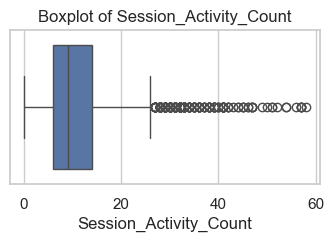

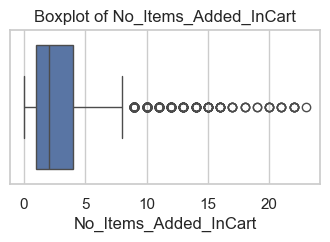

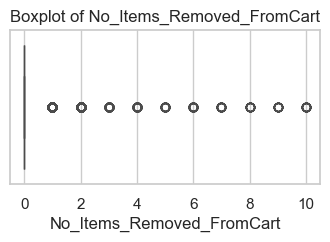

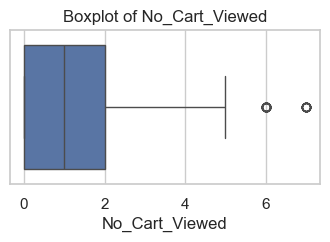

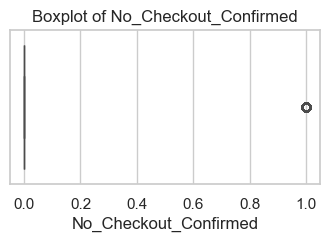

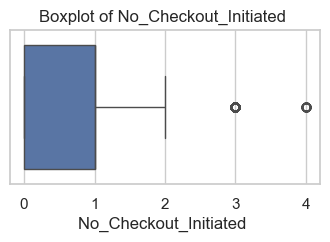

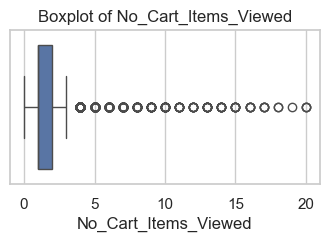

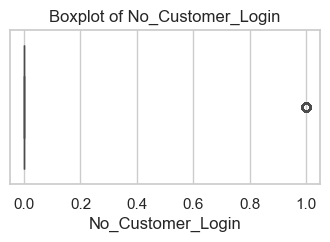

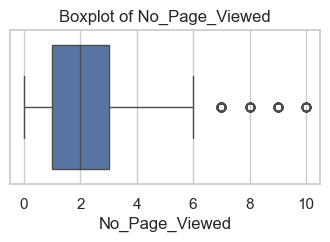

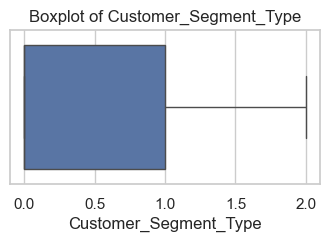

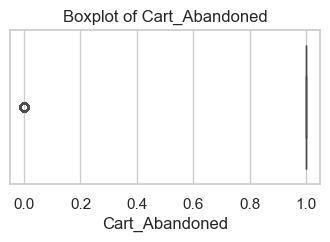

In [153]:
# Set the style
sns.set(style="whitegrid")

# Create boxplots for each numeric feature
for col in numeric_cols:
    plt.figure(figsize=(4, 2))
    sns.boxplot(x=df2[col])
    plt.title(f'Boxplot of {col}')
    plt.show()


In [154]:
df2.head(n=10)

,ID,Is_Product_Details_viewed,Session_Activity_Count,No_Items_Added_InCart,No_Items_Removed_FromCart,No_Cart_Viewed,No_Checkout_Confirmed,No_Checkout_Initiated,No_Cart_Items_Viewed,No_Customer_Login,No_Page_Viewed,Customer_Segment_Type,Cart_Abandoned
0,Session_ID_0,Yes,4,1.0,0,0.0,0,0,1,0,0,0,1
1,Session_ID_1,No,38,0.0,0,2.0,0,0,2,0,2,0,1
2,Session_ID_2,No,8,5.0,0,0.0,1,1,1,0,0,1,0
3,Session_ID_3,No,6,0.0,0,2.0,0,0,4,0,0,0,1
5,Session_ID_5,Yes,13,6.0,0,0.0,0,1,1,0,5,1,1
6,Session_ID_6,No,14,4.0,1,0.0,1,1,1,0,0,1,0
20,Session_ID_20,Yes,6,3.0,0,0.0,0,0,1,0,1,1,1
21,Session_ID_21,No,35,14.0,0,3.0,1,3,3,0,9,1,1
22,Session_ID_22,No,18,11.0,1,2.0,0,0,4,0,5,1,1
23,Session_ID_23,No,6,2.0,0,1.0,0,1,0,0,2,0,1


In [161]:
df2['Is_Product_Details_viewed'] = (
    df2['Is_Product_Details_viewed']
    .replace({"Yes": 1, "No": 0})
    .astype('int64')  # Use int8 for efficiency since it's binary
)
print(df2.dtypes)
df2.head(n=10)

ID                            object
Is_Product_Details_viewed      int64
Session_Activity_Count         int64
No_Items_Added_InCart        float64
No_Items_Removed_FromCart      int64
No_Cart_Viewed               float64
No_Checkout_Confirmed          int64
No_Checkout_Initiated          int64
No_Cart_Items_Viewed           int64
No_Customer_Login              int64
No_Page_Viewed                 int64
Customer_Segment_Type          int64
Cart_Abandoned                 int64
dtype: object


C:\Users\HP\AppData\Local\Temp\ipykernel_10848\1069255337.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Is_Product_Details_viewed'] = (


,ID,Is_Product_Details_viewed,Session_Activity_Count,No_Items_Added_InCart,No_Items_Removed_FromCart,No_Cart_Viewed,No_Checkout_Confirmed,No_Checkout_Initiated,No_Cart_Items_Viewed,No_Customer_Login,No_Page_Viewed,Customer_Segment_Type,Cart_Abandoned
0,Session_ID_0,1,4,1.0,0,0.0,0,0,1,0,0,0,1
1,Session_ID_1,0,38,0.0,0,2.0,0,0,2,0,2,0,1
2,Session_ID_2,0,8,5.0,0,0.0,1,1,1,0,0,1,0
3,Session_ID_3,0,6,0.0,0,2.0,0,0,4,0,0,0,1
5,Session_ID_5,1,13,6.0,0,0.0,0,1,1,0,5,1,1
6,Session_ID_6,0,14,4.0,1,0.0,1,1,1,0,0,1,0
20,Session_ID_20,1,6,3.0,0,0.0,0,0,1,0,1,1,1
21,Session_ID_21,0,35,14.0,0,3.0,1,3,3,0,9,1,1
22,Session_ID_22,0,18,11.0,1,2.0,0,0,4,0,5,1,1
23,Session_ID_23,0,6,2.0,0,1.0,0,1,0,0,2,0,1



Cart Abandoned Value Counts:
Class 1: 3375 entries (87.19%)
Class 0: 496 entries (12.81%)


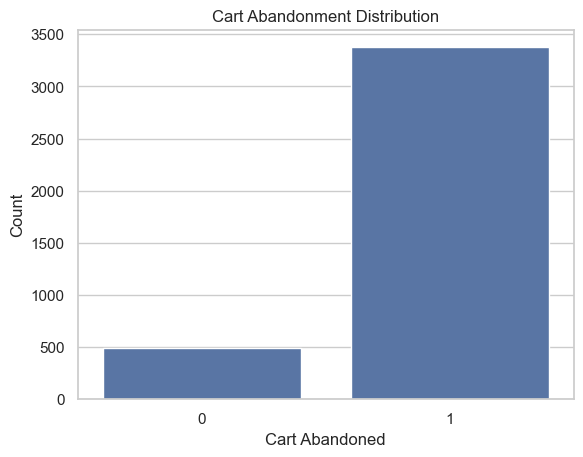

In [162]:
# Class distribution
print("\nCart Abandoned Value Counts:")
count_values = df2['Cart_Abandoned'].value_counts()
percent_values = df2['Cart_Abandoned'].value_counts(normalize=True) * 100

# Display both counts and percentages
for label, count in count_values.items():
    percent = percent_values[label]
    print(f"Class {label}: {count} entries ({percent:.2f}%)")

sns.countplot(x='Cart_Abandoned', data=df2)
plt.title('Cart Abandonment Distribution')
plt.xlabel('Cart Abandoned')
plt.ylabel('Count')
plt.show()


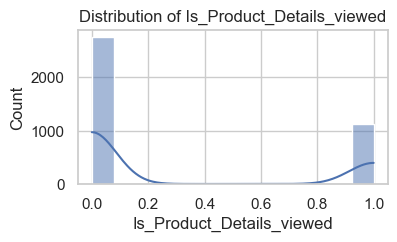

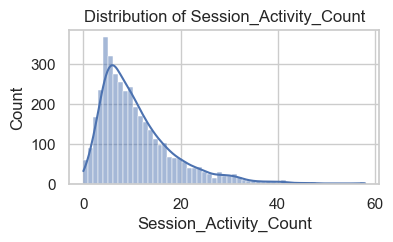

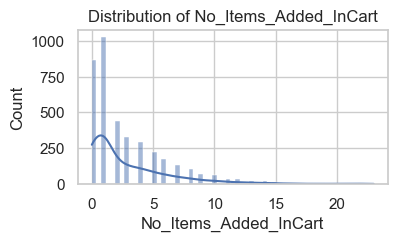

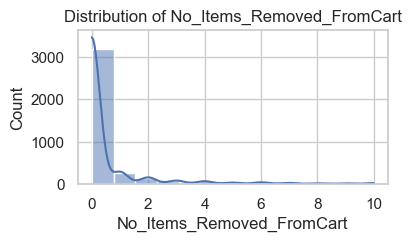

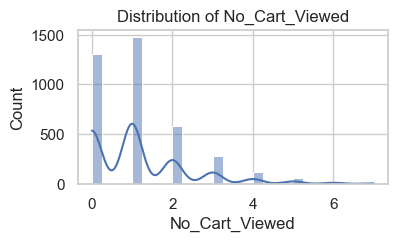

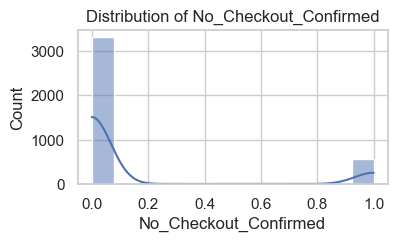

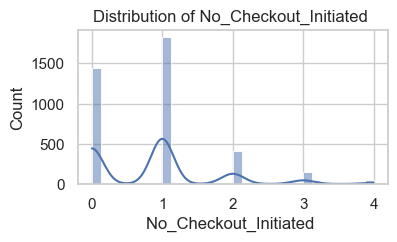

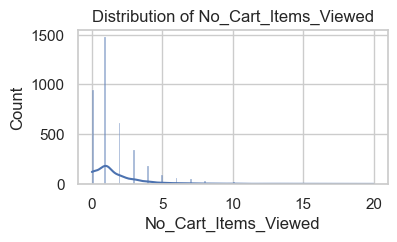

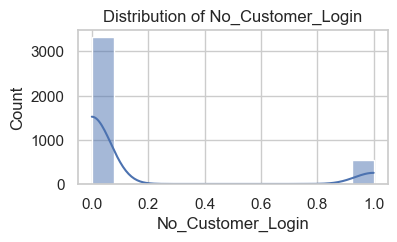

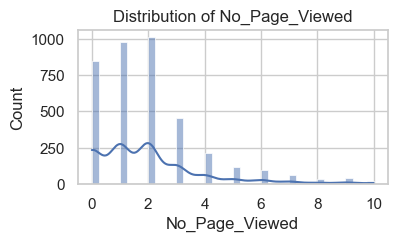

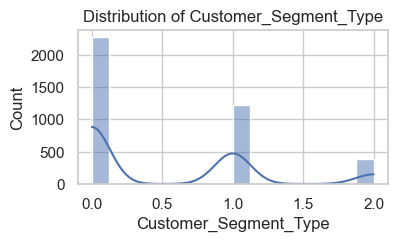

In [163]:
# Distribution of numeric variables
numeric_cols = df2.select_dtypes(include='number').columns

# Ensure 'Is_Product_Details_viewed' is included manually if it's not in numeric_cols
if 'Is_Product_Details_viewed' not in numeric_cols:
    numeric_cols = numeric_cols.append('Is_Product_Details_viewed')

# Only drop 'ID' and 'Cart_Abandoned' if they exist
columns_to_drop = ['ID', 'Cart_Abandoned']
numeric_cols = numeric_cols.drop([col for col in columns_to_drop if col in numeric_cols])

# Now plot
import matplotlib.pyplot as plt
import seaborn as sns

for col in numeric_cols:
    plt.figure(figsize=(4,2))
    sns.histplot(df2[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()


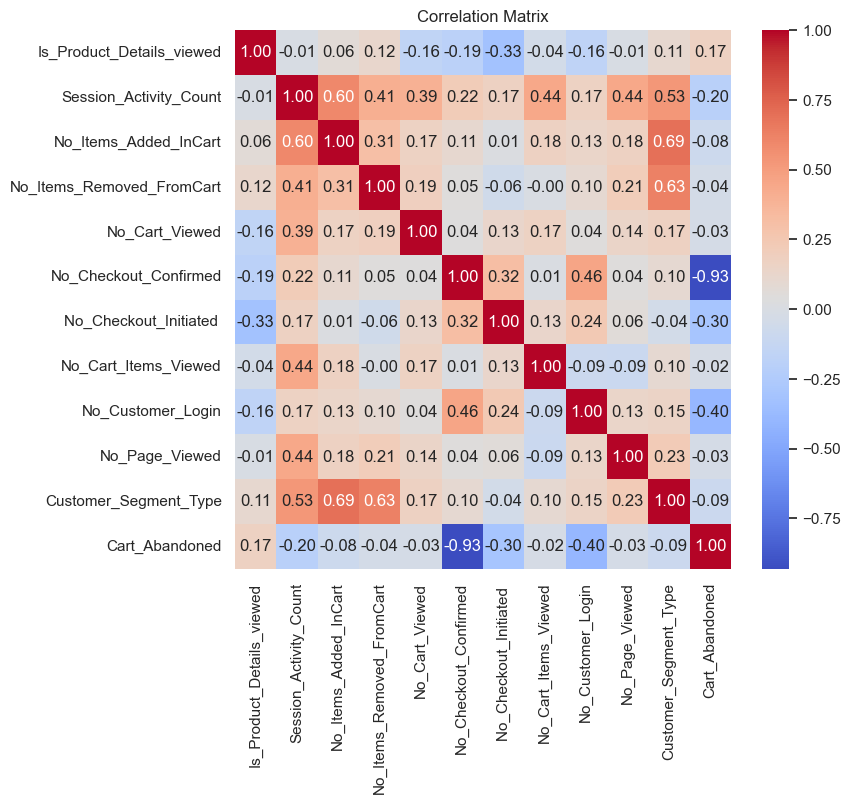

In [164]:
# Keep only numeric columns
numeric_df2 = df2.select_dtypes(include=['number'])

# Correlation matrix
corr = numeric_df2.corr()

# Heatmap
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,7))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()


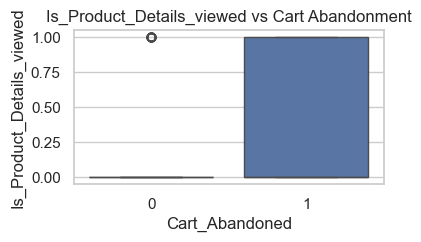

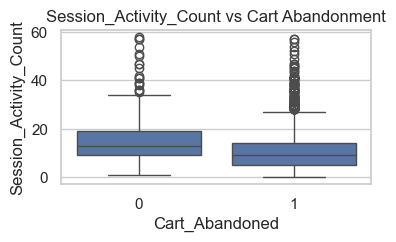

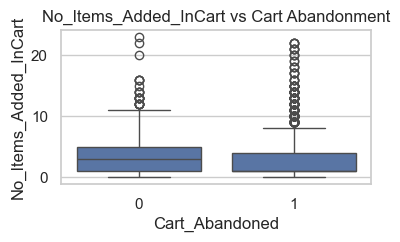

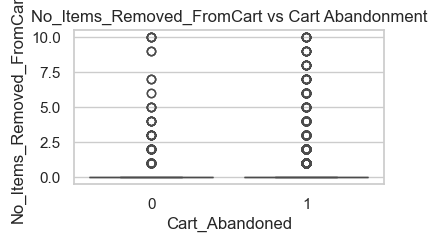

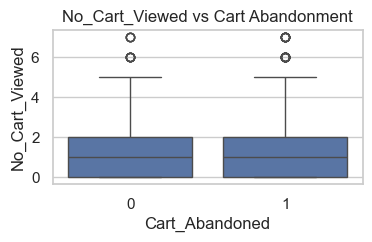

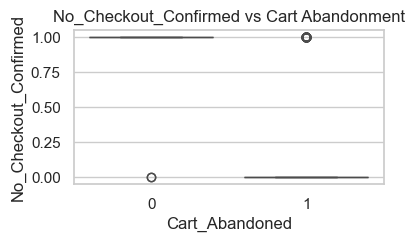

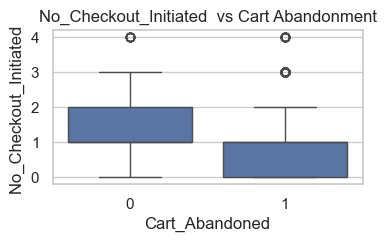

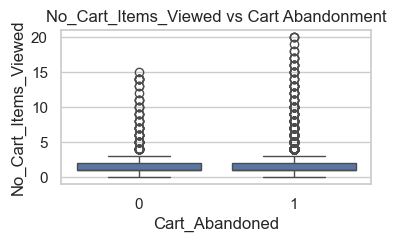

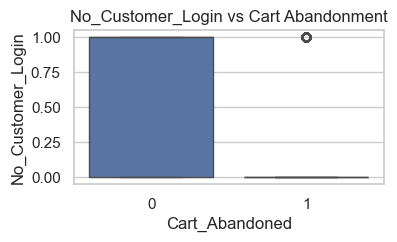

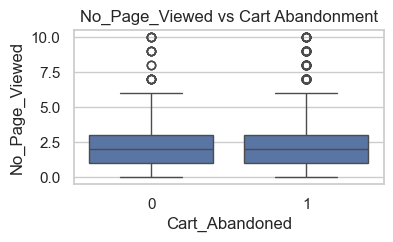

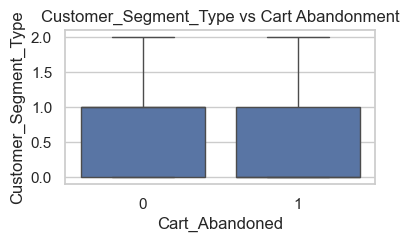

In [165]:
# Boxplots for each important variable vs target
for col in numeric_cols:
    plt.figure(figsize=(4,2))
    sns.boxplot(x='Cart_Abandoned', y=col, data=df2)
    plt.title(f'{col} vs Cart Abandonment')
    plt.show()

In [166]:
from sklearn.linear_model import LogisticRegression

X = df2.drop(['ID', 'Cart_Abandoned'], axis=1)  # Features
y = df2['Cart_Abandoned']  # Target

# Fit model
model = LogisticRegression()
model.fit(X, y)

# Get coefficients
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_[0]
}).sort_values('Coefficient', ascending=False)

print(feature_importance)

                      Feature  Coefficient
8           No_Customer_Login     0.593382
0   Is_Product_Details_viewed     0.137627
4              No_Cart_Viewed     0.129776
9              No_Page_Viewed     0.119754
2       No_Items_Added_InCart     0.117827
3   No_Items_Removed_FromCart     0.075586
7        No_Cart_Items_Viewed    -0.031491
1      Session_Activity_Count    -0.049773
6      No_Checkout_Initiated     -0.233984
10      Customer_Segment_Type    -0.336598
5       No_Checkout_Confirmed    -7.937992


In [170]:
# Drop 'ID' (irrelevant for prediction)
df3 = df2.drop(columns=['ID'])

# Separate features (X) and target (y)
X = df3.drop(columns=['Cart_Abandoned'])
y = df3['Cart_Abandoned']

In [171]:
target_corr = corr['Cart_Abandoned'].abs().sort_values(ascending=False)
print("Correlation with Target:\n", target_corr)

Correlation with Target:
 Cart_Abandoned               1.000000
No_Checkout_Confirmed        0.931662
No_Customer_Login            0.397429
No_Checkout_Initiated        0.302513
Session_Activity_Count       0.199749
Is_Product_Details_viewed    0.173018
Customer_Segment_Type        0.086679
No_Items_Added_InCart        0.083381
No_Items_Removed_FromCart    0.037310
No_Cart_Viewed               0.032887
No_Page_Viewed               0.027628
No_Cart_Items_Viewed         0.022915
Name: Cart_Abandoned, dtype: float64



Mutual Information Scores:
                       Feature  MI_Score
5       No_Checkout_Confirmed  0.326484
6      No_Checkout_Initiated   0.065174
8           No_Customer_Login  0.057580
1      Session_Activity_Count  0.021461
0   Is_Product_Details_viewed  0.020124
3   No_Items_Removed_FromCart  0.011250
10      Customer_Segment_Type  0.007727
7        No_Cart_Items_Viewed  0.004930
4              No_Cart_Viewed  0.000419
2       No_Items_Added_InCart  0.000000
9              No_Page_Viewed  0.000000


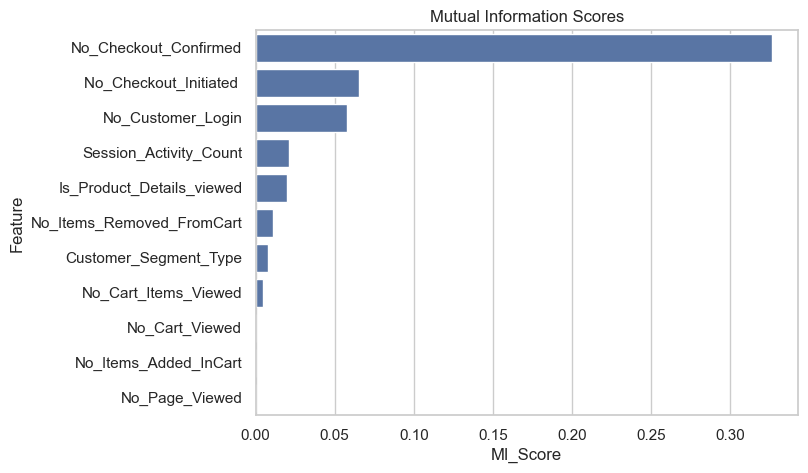

In [174]:
from sklearn.feature_selection import SelectKBest, mutual_info_classif, f_classif
# Calculate mutual information scores
mi_scores = mutual_info_classif(X, y, random_state=42)
mi_df = pd.DataFrame({'Feature': X.columns, 'MI_Score': mi_scores})
mi_df = mi_df.sort_values('MI_Score', ascending=False)

print("\nMutual Information Scores:\n", mi_df)

# Plot MI scores
plt.figure(figsize=(7, 5))
sns.barplot(x='MI_Score', y='Feature', data=mi_df)
plt.title("Mutual Information Scores")
plt.show()


ANOVA F-test Scores:
                       Feature       F_Score        P_Value
5       No_Checkout_Confirmed  25440.476466   0.000000e+00
8           No_Customer_Login    725.739962  1.186357e-146
6      No_Checkout_Initiated     389.732950   9.841386e-83
1      Session_Activity_Count    160.786404   3.950308e-36
0   Is_Product_Details_viewed    119.393871   2.149770e-27
10      Customer_Segment_Type     29.288846   6.613467e-08
2       No_Items_Added_InCart     27.086943   2.046083e-07
3   No_Items_Removed_FromCart      5.393409   2.026458e-02
4              No_Cart_Viewed      4.189105   4.075201e-02
9              No_Page_Viewed      2.955410   8.567060e-02
7        No_Cart_Items_Viewed      2.032655   1.540321e-01


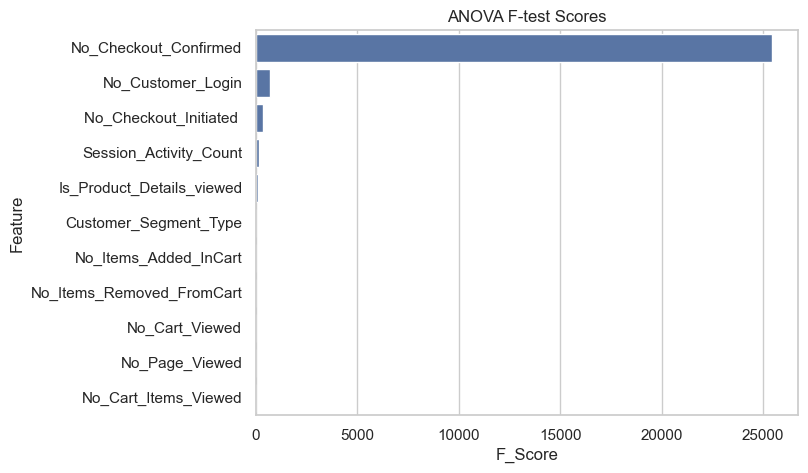

In [176]:
# Calculate ANOVA F-test scores
f_scores, p_values = f_classif(X, y)
anova_df = pd.DataFrame({'Feature': X.columns, 'F_Score': f_scores, 'P_Value': p_values})
anova_df = anova_df.sort_values('F_Score', ascending=False)

print("\nANOVA F-test Scores:\n", anova_df)

# Plot F-scores
plt.figure(figsize=(7, 5))
sns.barplot(x='F_Score', y='Feature', data=anova_df)
plt.title("ANOVA F-test Scores")
plt.show()

In [180]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
# Standardize features (important for logistic regression)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Initialize model (L1 regularization for sparsity)
model = LogisticRegression(penalty='l1', solver='liblinear', random_state=42)

# RFE: Select top 5 features
rfe = RFE(estimator=model, n_features_to_select=5, step=1)
rfe.fit(X_scaled, y)

# Get selected features
selected_features_rfe = X.columns[rfe.support_]
print("Selected Features (RFE):\n", selected_features_rfe)

# Feature ranking (1 = selected, higher = eliminated)
print("\nFeature Rankings (1 is best):\n", pd.DataFrame({
    'Feature': X.columns,
    'Rank': rfe.ranking_
}).sort_values('Rank'))

Selected Features (RFE):
 Index(['No_Items_Added_InCart', 'No_Checkout_Confirmed',
       'No_Cart_Items_Viewed', 'No_Customer_Login', 'Customer_Segment_Type'],
      dtype='object')

Feature Rankings (1 is best):
                       Feature  Rank
2       No_Items_Added_InCart     1
5       No_Checkout_Confirmed     1
7        No_Cart_Items_Viewed     1
8           No_Customer_Login     1
10      Customer_Segment_Type     1
9              No_Page_Viewed     2
1      Session_Activity_Count     3
4              No_Cart_Viewed     4
3   No_Items_Removed_FromCart     5
6      No_Checkout_Initiated      6
0   Is_Product_Details_viewed     7


In [200]:
# Check class distribution
class_distribution = df2["Cart_Abandoned"].value_counts()
print("Class Distribution:\n", class_distribution)

# Calculate imbalance ratio
imbalance_ratio = class_distribution.max() / class_distribution.min()
print("\nImbalance Ratio:", imbalance_ratio)

Class Distribution:
 Cart_Abandoned
1    3375
0     496
Name: count, dtype: int64

Imbalance Ratio: 6.804435483870968


In [220]:
from sklearn.model_selection import train_test_split

# Select your final features (replace with your chosen features)
selected_features = ['No_Checkout_Confirmed', 'No_Customer_Login', 'Session_Activity_Count', 'No_Checkout_Initiated ', 'Is_Product_Details_viewed']

X = df2[selected_features]
y = df2['Cart_Abandoned']

# Split data (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [206]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Verify new distribution
print(pd.Series(y_resampled).value_counts())

Cart_Abandoned
1    2700
0    2700
Name: count, dtype: int64


In [207]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score

# Initialize and train
model_lr = LogisticRegression(random_state=42, class_weight='balanced')  # Optional: class_weight
model_lr.fit(X_resampled, y_resampled)

# Evaluate
y_pred_lr = model_lr.predict(X_test)
y_proba_lr = model_lr.predict_proba(X_test)[:, 1]  # Probabilities for class 1

print("\nLogistic Regression Performance:")
print(classification_report(y_test, y_pred_lr))
print("ROC-AUC Score:", roc_auc_score(y_test, y_proba_lr))


Logistic Regression Performance:
              precision    recall  f1-score   support

           0       0.90      0.98      0.94       100
           1       1.00      0.98      0.99       675

    accuracy                           0.98       775
   macro avg       0.95      0.98      0.96       775
weighted avg       0.98      0.98      0.98       775

ROC-AUC Score: 0.9768000000000001


In [208]:
from sklearn.ensemble import RandomForestClassifier

model_rf = RandomForestClassifier(random_state=42, class_weight='balanced')  # Handle imbalance
model_rf.fit(X_resampled, y_resampled)

y_pred_rf = model_rf.predict(X_test)
y_proba_rf = model_rf.predict_proba(X_test)[:, 1]

print("\nRandom Forest Performance:")
print(classification_report(y_test, y_pred_rf))
print("ROC-AUC Score:", roc_auc_score(y_test, y_proba_rf))


Random Forest Performance:
              precision    recall  f1-score   support

           0       0.90      0.97      0.93       100
           1       1.00      0.98      0.99       675

    accuracy                           0.98       775
   macro avg       0.95      0.98      0.96       775
weighted avg       0.98      0.98      0.98       775

ROC-AUC Score: 0.982237037037037


In [209]:
from xgboost import XGBClassifier

# Calculate scale_pos_weight (ratio of majority/minority class)
scale_pos_weight = sum(y_resampled == 1) / sum(y_resampled == 0)  # ~1.0 after SMOTE

model_xgb = XGBClassifier(
    random_state=42,
    scale_pos_weight=scale_pos_weight,  # Handles imbalance
    eval_metric='logloss'
)
model_xgb.fit(X_resampled, y_resampled)

y_pred_xgb = model_xgb.predict(X_test)
y_proba_xgb = model_xgb.predict_proba(X_test)[:, 1]

print("\nXGBoost Performance:")
print(classification_report(y_test, y_pred_xgb))
print("ROC-AUC Score:", roc_auc_score(y_test, y_proba_xgb))


XGBoost Performance:
              precision    recall  f1-score   support

           0       0.90      0.98      0.94       100
           1       1.00      0.98      0.99       675

    accuracy                           0.98       775
   macro avg       0.95      0.98      0.96       775
weighted avg       0.98      0.98      0.98       775

ROC-AUC Score: 0.9868296296296297


<Figure size 800x600 with 0 Axes>

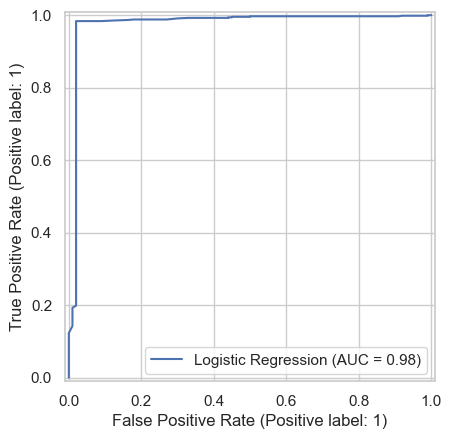

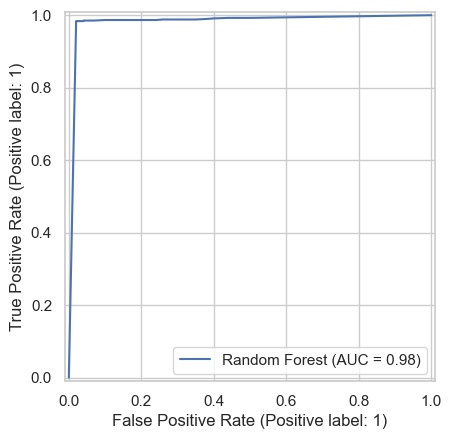

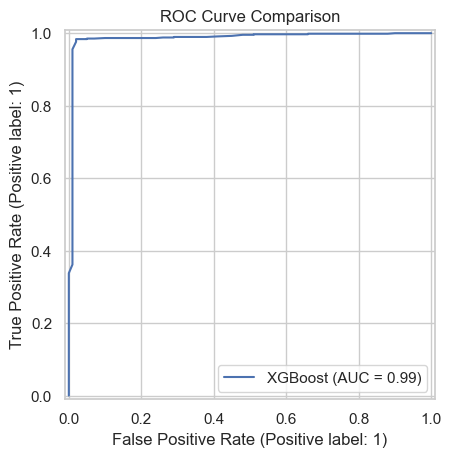

In [210]:
import matplotlib.pyplot as plt
from sklearn.metrics import RocCurveDisplay

# Plot ROC curves for all models
plt.figure(figsize=(8, 6))
RocCurveDisplay.from_estimator(model_lr, X_test, y_test, name='Logistic Regression')
RocCurveDisplay.from_estimator(model_rf, X_test, y_test, name='Random Forest')
RocCurveDisplay.from_estimator(model_xgb, X_test, y_test, name='XGBoost')
plt.title("ROC Curve Comparison")
plt.show()

In [217]:
import joblib
from sklearn.preprocessing import StandardScaler

# Save the XGBoost model
joblib.dump(model_xgb, 'xgb_cart_abandonment_model.pkl')

print("Model saved successfully!")

Model saved successfully!


In [218]:
import joblib
from sklearn.preprocessing import StandardScaler

# Save the XGBoost model
joblib.dump(model_rf, 'rf_cart_abandonment_model.pkl')

print("Model saved successfully!")

Model saved successfully!
